In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Model():
    def __init__(self):
        self.reward_map = -np.ones((4,4))
        self.reward_map[([0,0,0,2,2,2],[1,2,3,0,1,2])] = -10
        self.V = np.zeros(self.reward_map.shape)
        self.gamma = 1
        self.epsilon = .001
        self.policy = np.zeros((4,4,4))
        self.policy[:,:] = [.25,.25,.25,.25]
        
        self.actions = np.array([[-1,0],[+1,0],[0,1],[0,-1]])
        #print(self.reward_map)
        
    def updateV(self):
        
        while True:
            V_update = np.zeros(self.reward_map.shape)

            for i in range(self.reward_map.shape[0]):
                for j in range(self.reward_map.shape[1]):

                    state = [i,j]

                    #print(state)

                    if state != [0,0] :    
                        # V update
                        for a,action_prob in zip(self.actions,self.policy[tuple(state)]):
                            next_state = [state[0]+a[0],state[1]+a[1]]

                            next_state[0] = state[0] if next_state[0] == -1 else next_state[0]
                            next_state[1] = state[1] if next_state[1] == -1 else next_state[1]
                            next_state[0] = state[0] if next_state[0] == 4 else next_state[0]
                            next_state[1] = state[1] if next_state[1] == 4 else next_state[1]

                            #print(next_state)
                            #print(f"{action_prob}*({self.reward_map[tuple(next_state)]} + {self.gamma} * {self.V[next_state]})")
                            V_update[tuple(state)] += action_prob*(self.reward_map[tuple(next_state)] + self.gamma * self.V[tuple(next_state)])
            
            err = np.max(np.absolute(V_update-self.V))
            self.V = V_update

            if err < self.epsilon:
                #print(V_update)
                break

                
            
    def plot(self):
        fig, axs = plt.subplots(1,3)
        
        fig.set_size_inches(19,5)
        axs[0].pcolor(-self.V[::-1],cmap="YlGn")
        for y in range(self.V.shape[0]):
            for x in range(self.V.shape[1]):
                axs[0].text(x + 0.5, y + 0.5, '%.1f' % self.V[::-1][y, x],
                         horizontalalignment='center',
                         verticalalignment='center',
                         color = "y"
                         )
        
        
        axs[1].imshow(-self.V,cmap="YlGn")
        for i in range(self.policy.shape[0]):
            for j in range(self.policy.shape[1]):
                #print(f"State:{(i,j)}")
                #print(self.policy[i,j])
                #print("*"*50)
                for action in np.argwhere(self.policy[j,i] > np.max(self.policy[j,i])-.1):
                    if action[0] == 3:
                        axs[1].arrow(i, j, -.3, 0, width = 0.05,color="y")
                        axs[2].arrow(i, j, -.3, 0, width = 0.05,color="y")
                    if action[0] == 2:
                        axs[1].arrow(i, j, .3, 0, width = 0.05,color="y")
                        axs[2].arrow(i, j, .3, 0, width = 0.05,color="y")
                    if action[0] == 1:
                        axs[1].arrow(i, j, 0, +.3, width = 0.05,color="y")
                        axs[2].arrow(i, j, 0, +.3, width = 0.05,color="y")
                    if action[0] == 0:
                        axs[1].arrow(i, j, 0, -.3, width = 0.05,color="y")
                        axs[2].arrow(i, j, 0, -.3, width = 0.05,color="y")
        axs[2].imshow(self.reward_map,cmap="gray")
        
        plt.show()
                        
    def update_policy(self):
        for i in range(self.policy.shape[0]):
            for j in range(self.policy.shape[1]):

                state = [i,j]

                #print(state)

                if state != [0,0]:    
                   
                    q = []
                    for a in self.actions:
                        next_state = [state[0]+a[0],state[1]+a[1]]
                        next_state[0] = state[0] if next_state[0] == -1 else next_state[0]
                        next_state[1] = state[1] if next_state[1] == -1 else next_state[1]
                        next_state[0] = state[0] if next_state[0] == 4 else next_state[0]
                        next_state[1] = state[1] if next_state[1] == 4 else next_state[1]
                        q.append(self.reward_map[tuple(next_state)]+self.gamma*self.V[tuple(next_state)])
                    
                    q = np.array(q)
                    #print(f"State: {(i,j)}")
                    #print(q)
                    best_actions = np.argwhere(q >= np.max(q) -.1).flatten()
                    
                    #print(best_actions)
                    
                    self.policy[tuple(state)] = 0
                    self.policy[tuple(state)][best_actions] = 1/len(best_actions)
                    
                    #print(self.policy[tuple(state)])

In [3]:
#[[-1,0],[+1,0],[0,1],[0,-1]]


#["ariba","abajo","derecha","izquierda"]
#ab
#d
#i

In [5]:
model = Model()
print(model.policy)

[[[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]]


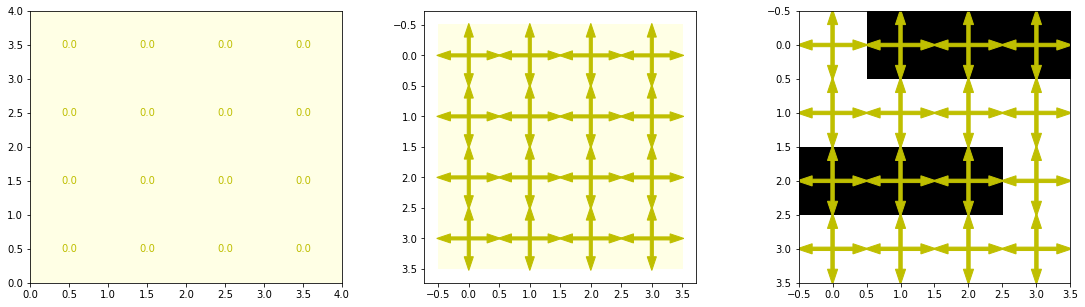

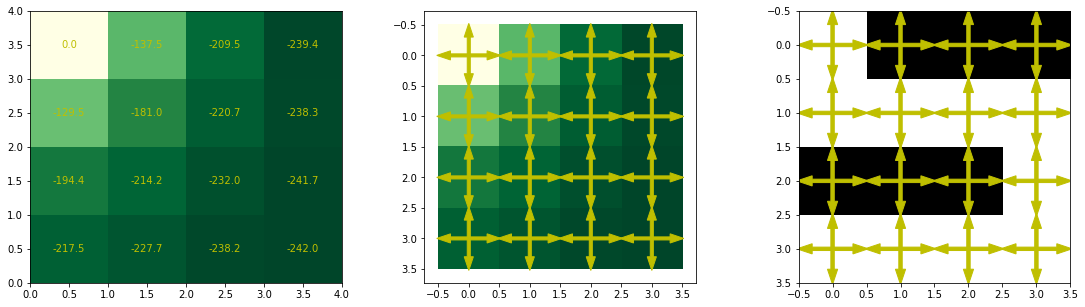

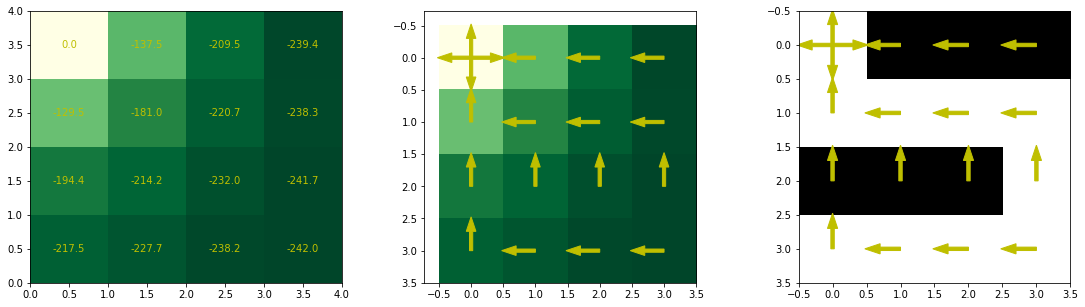

//////////////////////////////////////////////////


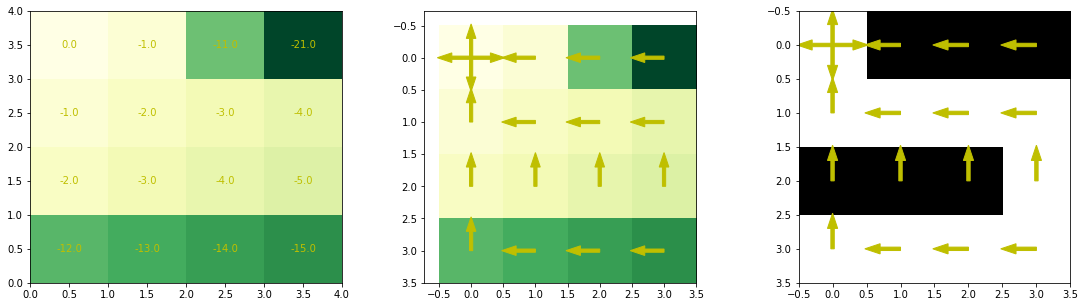

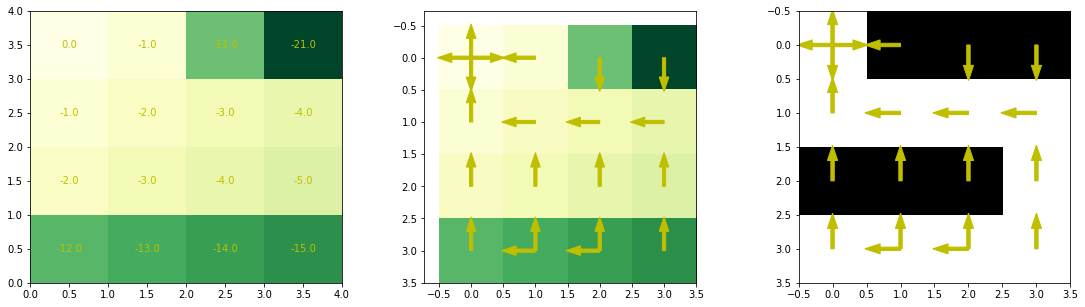

//////////////////////////////////////////////////


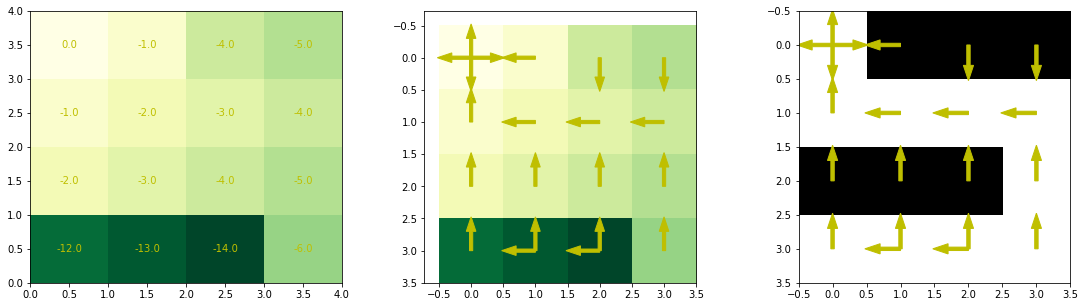

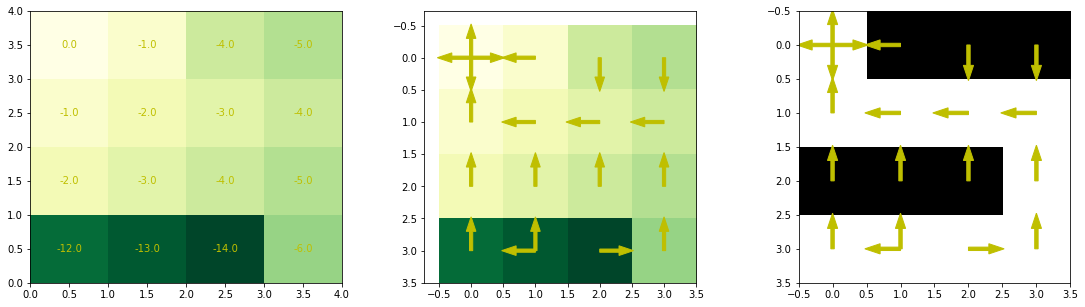

//////////////////////////////////////////////////


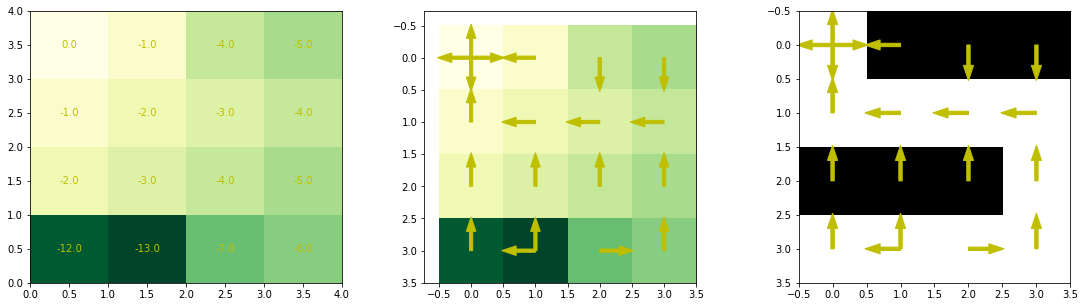

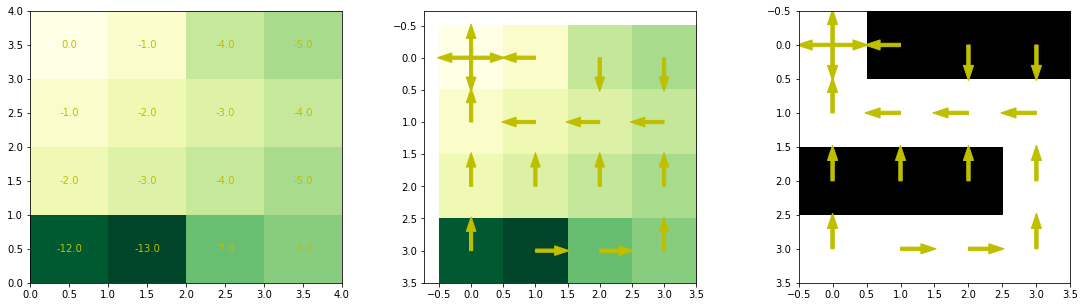

//////////////////////////////////////////////////


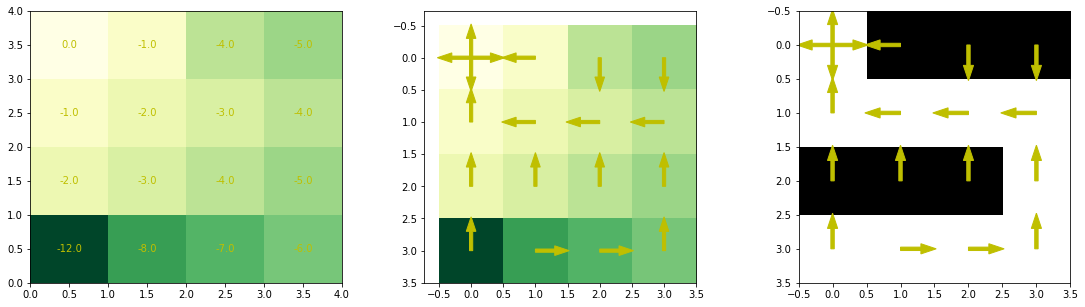

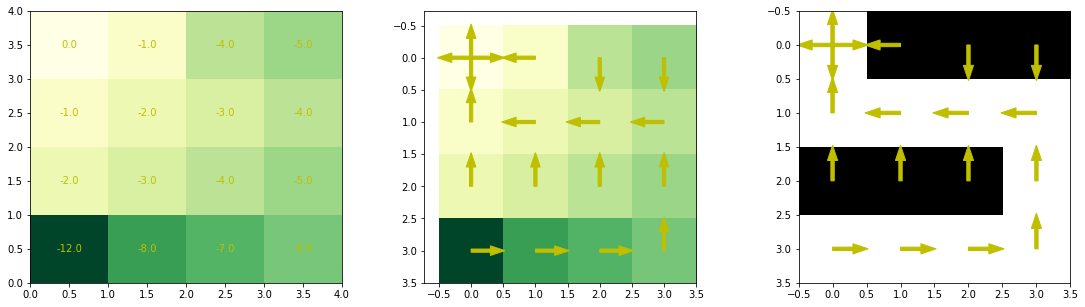

//////////////////////////////////////////////////


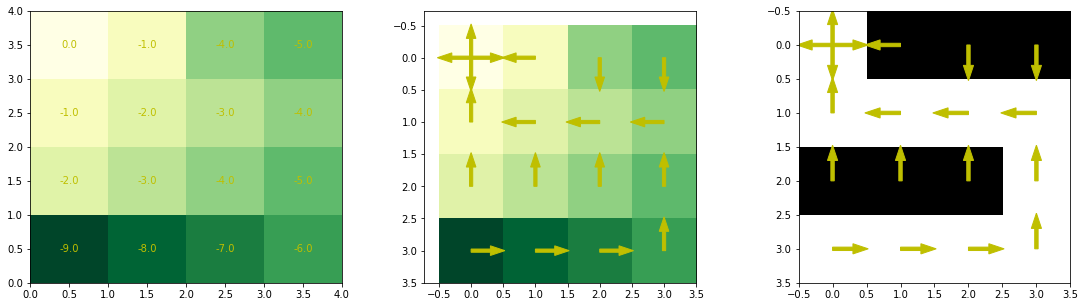

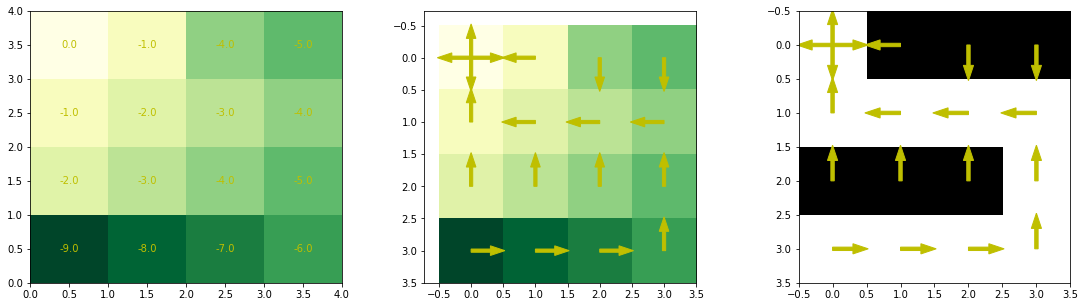

//////////////////////////////////////////////////


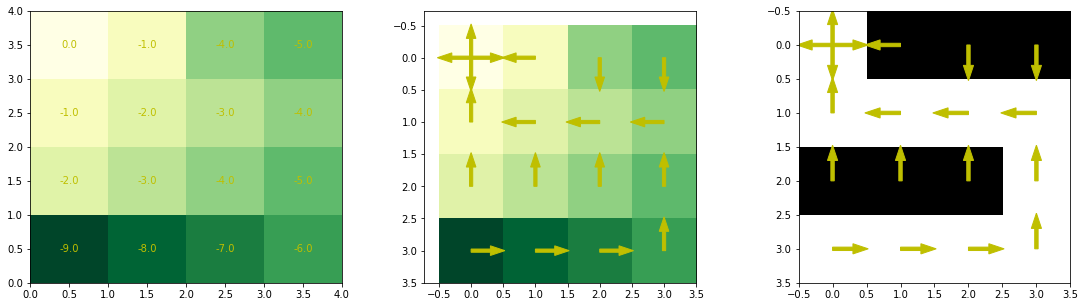

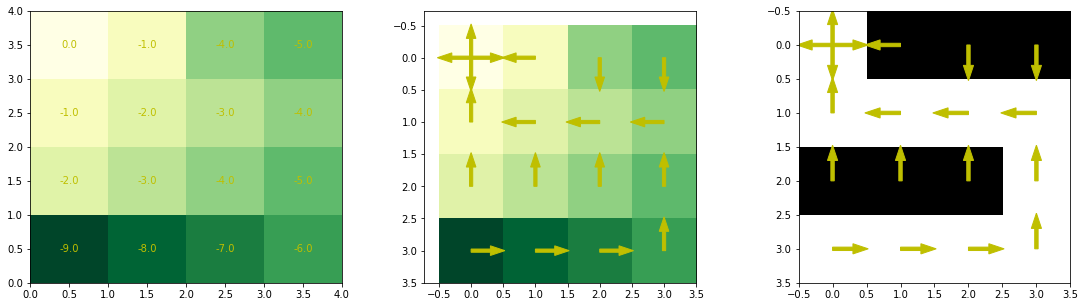

//////////////////////////////////////////////////


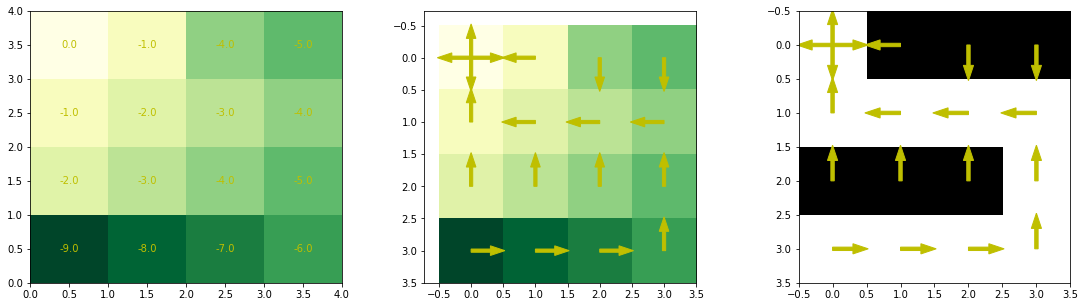

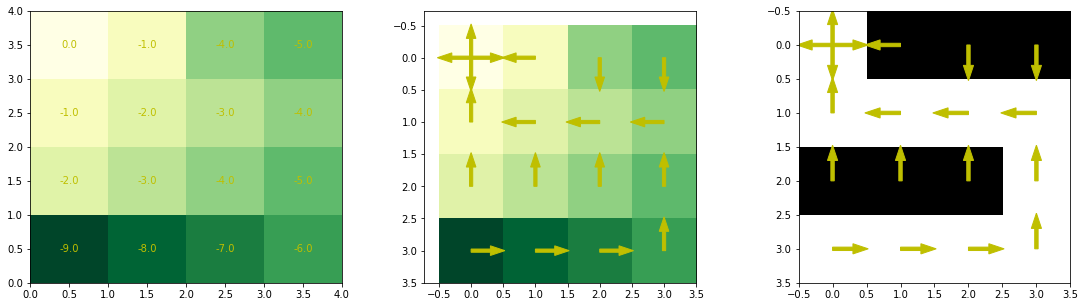

//////////////////////////////////////////////////


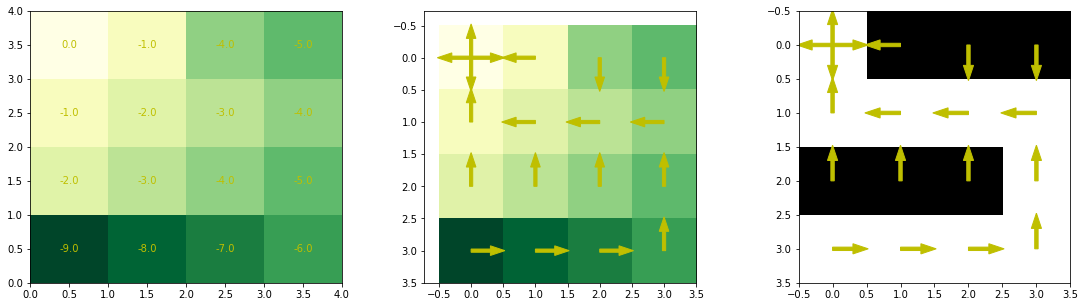

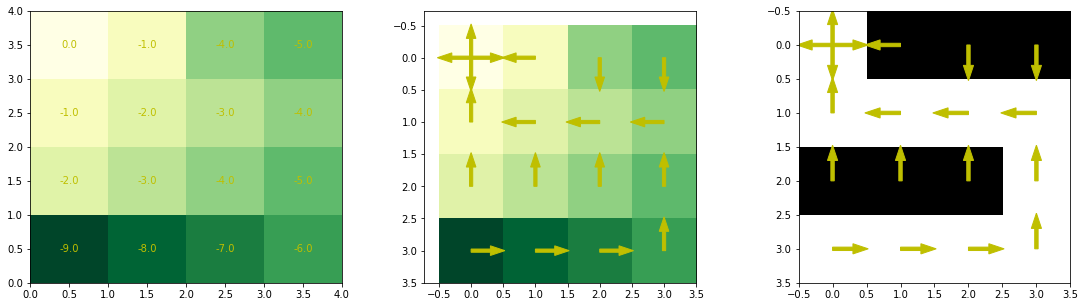

//////////////////////////////////////////////////


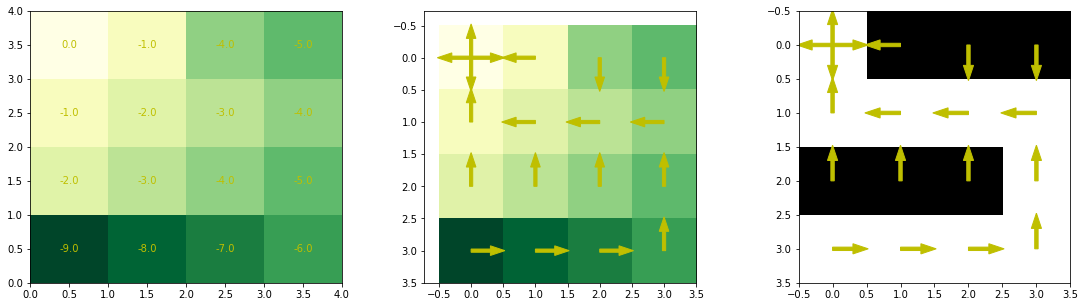

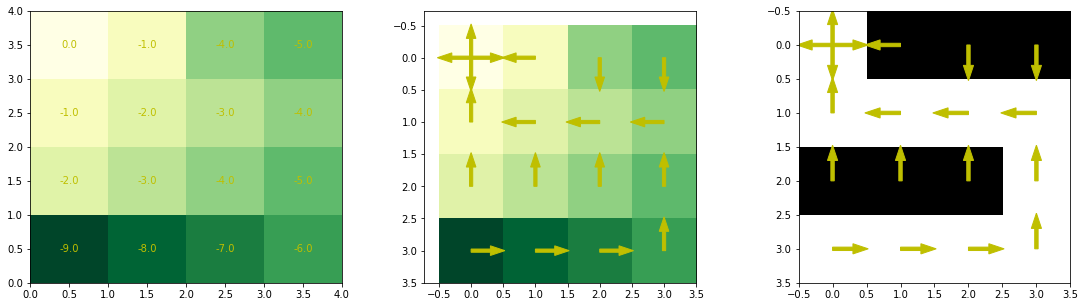

//////////////////////////////////////////////////


In [6]:


model.plot()
for i in range(10):
    model.updateV()
    model.plot()
    model.update_policy()
    model.plot()
    #print(model.policy)
    print("/"*50)


## 

In [7]:
print(model.policy)

[[[0.25 0.25 0.25 0.25]
  [0.   0.   0.   1.  ]
  [0.   1.   0.   0.  ]
  [0.   1.   0.   0.  ]]

 [[1.   0.   0.   0.  ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]]

 [[1.   0.   0.   0.  ]
  [1.   0.   0.   0.  ]
  [1.   0.   0.   0.  ]
  [1.   0.   0.   0.  ]]

 [[0.   0.   1.   0.  ]
  [0.   0.   1.   0.  ]
  [0.   0.   1.   0.  ]
  [1.   0.   0.   0.  ]]]
